### Université de Poitiers
# ACP. Classification avec AFD

Rania BEN DHIA, rania.ben.dhia@etu.univ-poitiers.fr

Marwan AL OMARI, marwan.al.omari@etu.univ-poitiers.fr

## Analyse en composantes principales sous Python

In [147]:
#Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as AFD
from scipy.spatial import distance
import pandas as pd
import csv
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.io import loadmat
from scipy.spatial import ConvexHull
import matplotlib as mpl
import matplotlib.cm as cm
from affichage_acp import my_biplot
%matplotlib inline

In [148]:
X = pd.read_csv('notes.csv', delimiter=';')
X.head()

,Unnamed: 0,jean,aline,annie,monique,didier,andreas,pierre,brigitte,evelyne
0,math,6.0,8.0,6.0,14.5,14.0,11.0,5.5,13.0,9.0
1,scie,6.0,8.0,7.0,14.5,14.0,10.0,7.0,12.5,9.5
2,fran,5.0,8.0,11.0,15.5,12.0,5.5,14.0,8.5,12.5
3,lati,5.5,8.0,9.5,15.0,12.5,7.0,11.5,9.5,12.0
4,d-m,8.0,9.0,11.0,8.0,10.0,13.0,10.0,12.0,18.0


In [149]:
cols = ["math","scie","fran"]
X = pd.read_csv("notes.csv", delimiter=';', usecols=[1,2,3,4,5,6,7,8])
X.head()

,jean,aline,annie,monique,didier,andreas,pierre,brigitte
0,6.0,8.0,6.0,14.5,14.0,11.0,5.5,13.0
1,6.0,8.0,7.0,14.5,14.0,10.0,7.0,12.5
2,5.0,8.0,11.0,15.5,12.0,5.5,14.0,8.5
3,5.5,8.0,9.5,15.0,12.5,7.0,11.5,9.5
4,8.0,9.0,11.0,8.0,10.0,13.0,10.0,12.0


In [150]:
print(X)

   jean  aline  annie  monique  didier  andreas  pierre  brigitte
0   6.0    8.0    6.0     14.5    14.0     11.0     5.5      13.0
1   6.0    8.0    7.0     14.5    14.0     10.0     7.0      12.5
2   5.0    8.0   11.0     15.5    12.0      5.5    14.0       8.5
3   5.5    8.0    9.5     15.0    12.5      7.0    11.5       9.5
4   8.0    9.0   11.0      8.0    10.0     13.0    10.0      12.0


In [151]:
#Transpose
X = X.T

In [152]:
print(X)

             0     1     2     3     4
jean       6.0   6.0   5.0   5.5   8.0
aline      8.0   8.0   8.0   8.0   9.0
annie      6.0   7.0  11.0   9.5  11.0
monique   14.5  14.5  15.5  15.0   8.0
didier    14.0  14.0  12.0  12.5  10.0
andreas   11.0  10.0   5.5   7.0  13.0
pierre     5.5   7.0  14.0  11.5  10.0
brigitte  13.0  12.5   8.5   9.5  12.0


In [153]:
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]

In [154]:
nomi = list(X.index)
nomi
nomv = list(X.columns)
nomv

[0, 1, 2, 3, 4]

In [155]:
my_columns = X[[2]]

print(my_columns)

             2
jean       5.0
aline      8.0
annie     11.0
monique   15.5
didier    12.0
andreas    5.5
pierre    14.0
brigitte   8.5


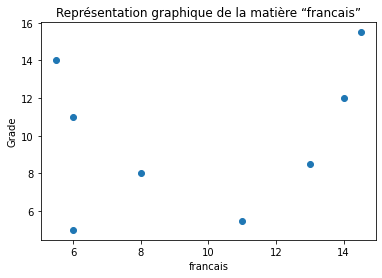

In [156]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(X[0],X[[2]])
plt.xlabel('francais')
plt.ylabel('Grade')
plt.title('Représentation graphique de la matière “francais”')
plt.show()

In [157]:
my_columns = X[[3]]

print(my_columns)

             3
jean       5.5
aline      8.0
annie      9.5
monique   15.0
didier    12.5
andreas    7.0
pierre    11.5
brigitte   9.5


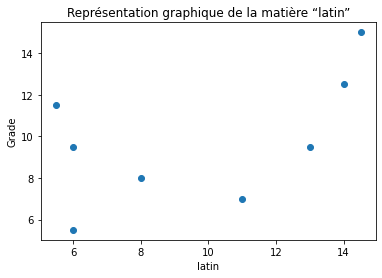

In [158]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(X[0],X[[3]])
plt.xlabel('latin')
plt.ylabel('Grade')
plt.title('Représentation graphique de la matière “latin”')
plt.show()

In [159]:
my_columns = X[[0,1]]

print(my_columns)

             0     1
jean       6.0   6.0
aline      8.0   8.0
annie      6.0   7.0
monique   14.5  14.5
didier    14.0  14.0
andreas   11.0  10.0
pierre     5.5   7.0
brigitte  13.0  12.5


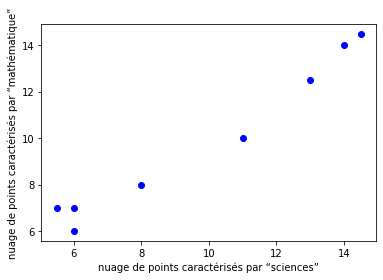

In [160]:
plt.plot(X[[0]],X[[1]],"ob") # ob = type de points "o" ronds, "b" bleus
plt.ylabel('nuage de points caractérisés par “mathématique”')
plt.xlabel('nuage de points caractérisés par “sciences”')
plt.show()

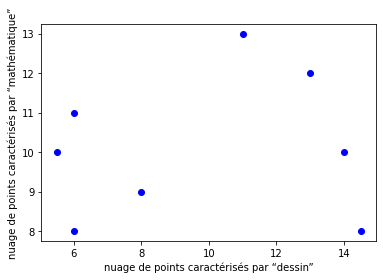

In [161]:
plt.plot(X[[0]],X[[4]],"ob") # ob = type de points "o" ronds, "b" bleus
plt.ylabel('nuage de points caractérisés par “mathématique”')
plt.xlabel('nuage de points caractérisés par “dessin”')
plt.show()

# Calcul de l’ACP
x données de p dim x(p) dans tableau nxp

In [162]:
acp = PCA(n_components=5)
cc = acp.fit_transform(X)

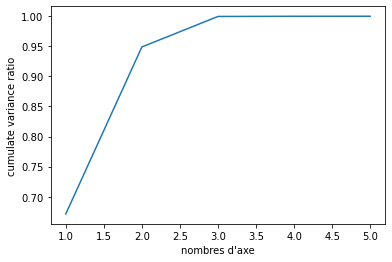

In [163]:
## L’´evolution de l’inertie expliqu´ee (variance) cumuLée selon le nombre d’axes (scree–plot)
plt.plot(np.arange(1,6),acp.explained_variance_ratio_.cumsum())
plt.ylabel ("cumulate variance ratio")
plt.xlabel("nombres d'axe")
plt.show()

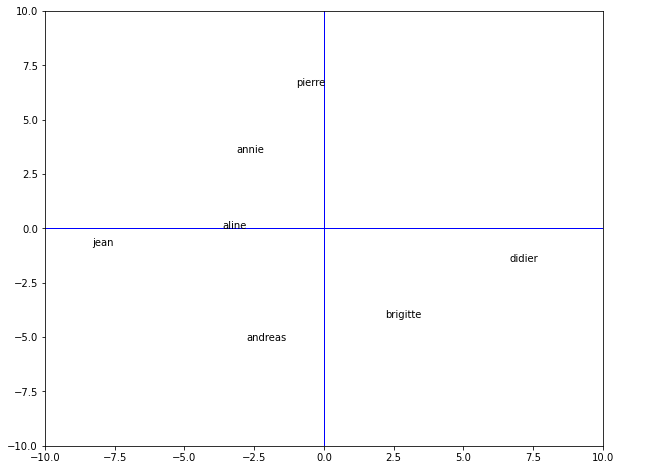

In [164]:
#Projection des individus sur E1 ∪ E2 et E1 ∪ E3
fig, axes = plt.subplots(figsize=(10,8))
#positionnement des individus dans le premier plan
axes.set_xlim(-10,10) #même limites en abscisse
axes.set_ylim(-10,10) #et en ordonnée
#placement des étiquettes des observations
for i in range(8):
    plt.annotate(X.index[i],(cc[i,0],cc[i,1]))

#ajouter les axes
plt.plot([-20,10],[0,0],color='blue',linestyle='-',linewidth=1)
plt.plot([0,0],[-20,10],color='blue',linestyle='-',linewidth=1)
#affichage
plt.show()

In [165]:
#Preparation des données
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]

##Calcul les corrélations entre les variables initiales 
eigval = (n-1)/n*acp.explained_variance_
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
print("-----")

#on affiche pour les trois premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]}))

[[ 2.97311621e+00 -1.96948752e+00  1.61828847e-01 -7.36959553e-02
   8.90260242e-03]
 [ 2.90701803e+00 -1.25791110e+00  7.11608144e-02  9.33374378e-02
   2.25524613e-03]
 [ 2.66695215e+00  2.37787382e+00 -2.68602124e-01 -5.19111786e-03
   2.74231313e-02]
 [ 2.65305967e+00  1.15089116e+00 -7.74327231e-02 -1.45746595e-02
  -4.01178296e-02]
 [-1.55316989e-01 -7.54759011e-01 -1.50518570e+00 -1.83449957e-03
  -1.76609138e-03]]
-----
   id     COR_1     COR_2     COR_3
0   0  2.973116 -1.969488  0.161829
1   1  2.907018 -1.257911  0.071161
2   2  2.666952  2.377874 -0.268602
3   3  2.653060  1.150891 -0.077433
4   4 -0.155317 -0.754759 -1.505186


In [166]:
print ('les valeurs propres sont :', acp.explained_variance_)
print (acp.explained_variance_ratio_)
print (acp.explained_variance_ratio_.cumsum())

les valeurs propres sont : [3.59607504e+01 1.48682479e+01 2.71426211e+00 1.64408056e-02
 2.79877706e-03]
[6.71379237e-01 2.77586893e-01 5.06746719e-02 3.06946196e-04
 5.22525472e-05]
[0.67137924 0.94896613 0.9996408  0.99994775 1.        ]


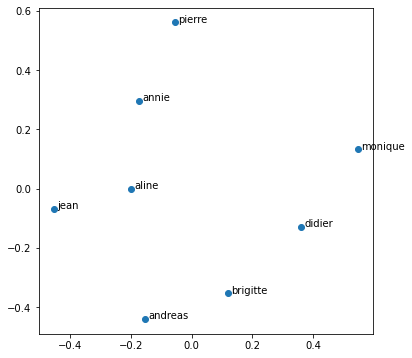

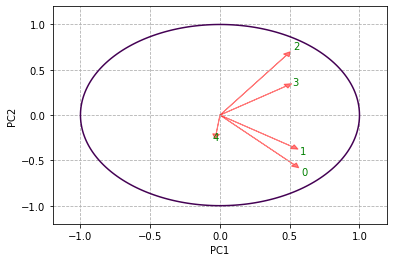

In [167]:
##la représentation simultanée des individus et des variables (biplot) dans les plans E1 ∪ E2 et E1 ∪ E3

nomv = list(X.columns)
nomi = list(X.index)
my_biplot(score=cc[:,0:2],coeff=np.transpose(acp.components_[0:2,:]),
coeff_labels=nomv,score_labels=nomi)

### 1.2 Données réelles

In [41]:
# importer les donneés en form de X et Y
def read_HSI():
  X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


In [42]:
# convertir les données vers ".csv" pour faciliter l'exploitation des donneés
def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X, y)

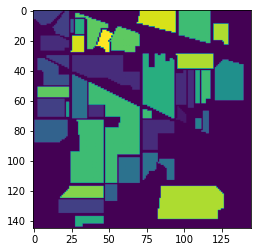

In [43]:
"afficher une composante de l’image"
res = X[:,:,18]
plt.imshow((res-np.min(res))/(np.max(res)-np.min(res)))
''''''

''''''
imgtmp = loadmat("Indian_pines_corrected.mat")
img = np.float32(imgtmp['indian_pines_corrected'])
maptmp = loadmat("Indian_pines_gt.mat")
map = (maptmp['indian_pines_gt'])
# On normalise avant affichage car ce sont des réels
plt.imshow(map)

### ACP

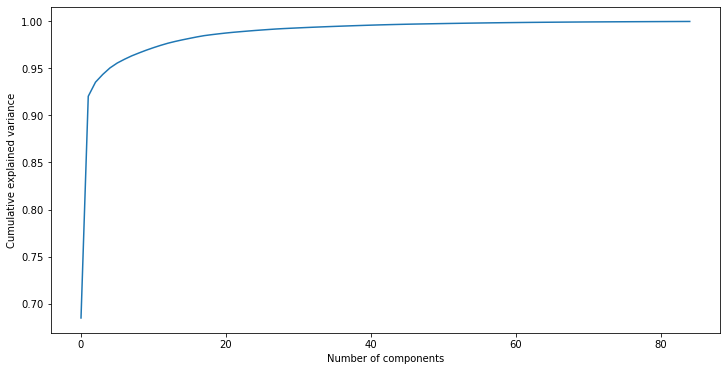

In [44]:
"l'implementation d'ACP"
acp = PCA(n_components = 85)
principalComponents = acp.fit_transform(df.iloc[:, :-1].values)
ev=acp.explained_variance_ratio_
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

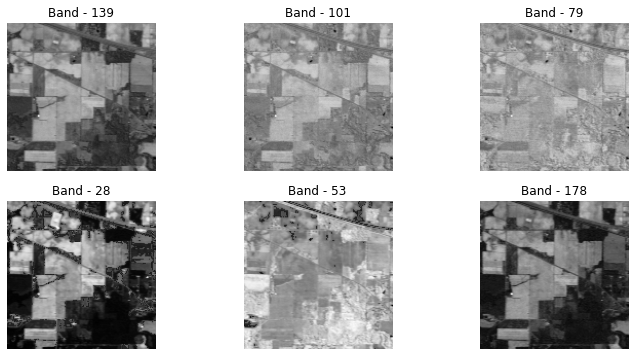

In [45]:
## Visualiser sous forme d’une image en niveaux de gris la projection sur le principal axe factoriel par differents Bands.
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='Greys_r')
    plt.axis('off')
    plt.title(f'Band - {q}')

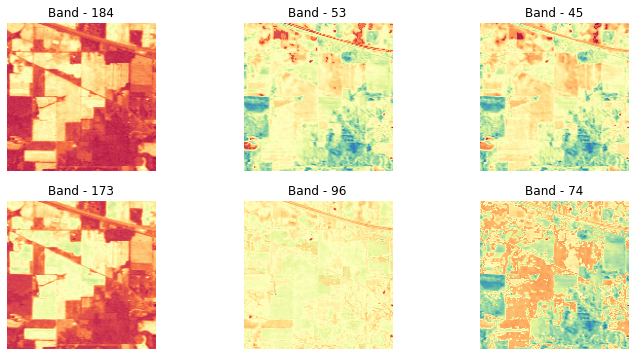

In [46]:
## Visualise sous forme d’une image en niveaux de couleur la projection sur le principal axe factoriel par differents Bands.
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='Spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

[[ -2.42665617 -44.68696465  75.48233077 ...   0.           0.
    0.        ]
 [160.55073266 -54.32984566  42.61348069 ...   0.           0.
    0.        ]
 [201.41730794 -69.50083231  46.89735389 ...   0.           0.
    0.        ]
 ...
 [ 17.48098534  -4.46941272  -2.15288918 ...   0.           0.
    0.        ]
 [  8.53395003  -2.13339967  -0.92900852 ...   0.           0.
    0.        ]
 [  3.38261985  -0.72727987  -0.329032   ...   0.           0.
    0.        ]]


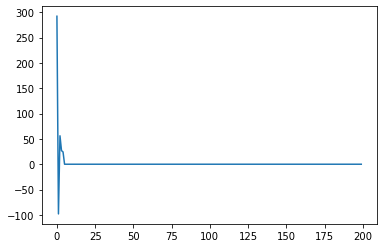

In [47]:
##Calcul des corrélations entre les variables initiales (longueur d’ondes) et les composantes principales retenues
eigval = (n-1)/n*acp.explained_variance_
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((200,200))

for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
plt.plot(corvar[k,:])

# 2. Programmation d’une ACP avec Python

### Calcul d'une ACP

[[ 9.66666667]
 [ 9.83333333]
 [10.22222222]
 [10.05555556]
 [11.        ]]
[[11.38888889  9.91666667  2.65740741  4.82407407  0.11111111]
 [ 9.91666667  8.94444444  4.12037037  5.48148148  0.05555556]
 [ 2.65740741  4.12037037 12.0617284   9.29320988  0.38888889]
 [ 4.82407407  5.48148148  9.29320988  7.91358025  0.66666667]
 [ 0.11111111  0.05555556  0.38888889  0.66666667  8.66666667]]
[2.82532498e+01 1.20747233e+01 8.61573358e+00 9.86980472e-03
 2.17321823e-02]
[[-0.51453535 -0.56694916  0.05132308  0.57254891 -0.28874852]
 [-0.50698853 -0.37199576  0.01445296 -0.54635285  0.55305647]
 [-0.49235486  0.65035356 -0.10806565  0.40978192  0.39373536]
 [-0.48462835  0.32323853 -0.02254331 -0.45343643 -0.67419539]
 [-0.03062778  0.11289333  0.99245689  0.01266839  0.03443659]]


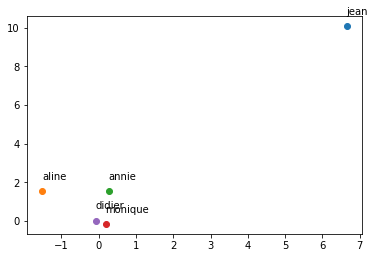

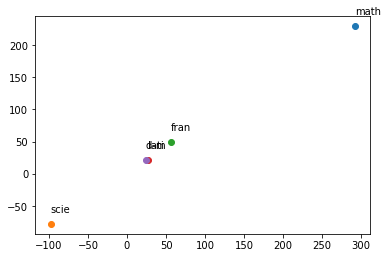

In [49]:
def myacp(x):
    (P,N)=np.shape(x)
    Xbarre = np.zeros((P,1))
    for i in range(P) :
        Xbarre[i]= sum(x[i,:])/N
    print(Xbarre)
    E = (N**(-1))*np.dot(x,np.transpose(x))-np.dot(Xbarre,np.transpose(Xbarre))
    print(E)
    u = np.zeros((P,P))
    VP = np.linalg.eig(E)
    lambd = VP[0]
    u=VP[1]
    print(lambd)
    print(u)
    Y = np.zeros((P,N))
    for i in range (5) :
        for j in range (P) :
            Y[j,i] = np.dot(np.transpose(u[:,i]),(x[:,j]-Xbarre[j]))
            
    return cc,lambd,u,corvar 
                

# u -> vecteurs propres

      
def affiche_element(cc1,cc2,mylist):
    N = cc1.shape[0]
    for ind in range(0,5):
        plt.plot(cc1[ind],cc2[ind],"o")
        plt.text(cc1[ind],cc2[ind],mylist[ind])
    plt.show()

# Tableau de notes
    
x = np.loadtxt("notes.txt",dtype=float)

fh = open('nomi.txt', 'r') 
nomi=fh.readlines()
fh.close()

fh = open('nomv.txt', 'r') 
nomv=fh.readlines()
fh.close()


cc,lambd,u,corx_u= myacp(x)    


affiche_element(cc[4,:],cc[3,:],nomi)

affiche_element(corx_u[4,:],corx_u[3,:],nomv)

# 3. Analyse Factorielle Discriminante

## Charger des données

In [168]:
fb=pd.read_csv('fake.csv', delimiter=';')
ob=pd.read_csv('original.csv', delimiter=';')
df= pd.concat([ob,fb],axis=0,ignore_index=True)

## 3.1 Détection des faux billets

### 3.1.1 Analyse des mesures

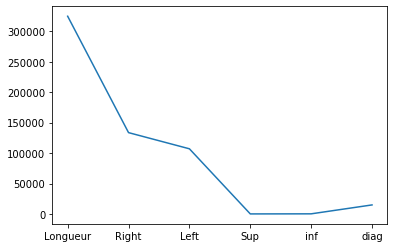

In [187]:
#Calcul le critère de Fisher
moyfb = np.mean(fb)
moyob = np.mean(ob)
moy = np.mean(df)
inter = ((pow(moyob,2))*len(ob)+(pow(moyfb,2))*len(fb))/len(df)
var = np.var(df)
fisher = inter/var
plt.plot(fisher)

### L'extraction du vecteur des mesures qui associe au billet inconnu

In [189]:
df_tst = pd.read_csv('inconnu.csv', delimiter=';')

df_fb = fb[['diag','Sup']]
df_ob = ob[['diag','Sup']]

grav_fb = np.mean(df_fb)
grav_ob = np.mean(df_ob)

print(grav_fb,grav_ob)

diag    139.445918
Sup      10.533673
dtype: float64 diag    141.520408
Sup       8.300000
dtype: float64


In [188]:
df_tstafd = df_tst[['diag','Sup']]

for i in range(4):
    distfb = distance.euclidean(df_tstafd.loc[i,:],grav_fb)
    distob = distance.euclidean(df_tstafd.loc[i,:],grav_ob)
    
print(distfb,distob)

0.458900139219755 2.8134894020729675


### 3.1.2 Sélection par AFD

In [229]:
#ob
l0 = [0 for i in range (0,98)] 
#fb
l1 = [0 for i in range (0,98)]

y_train = np.concatenate((l0,l1))
y_train.shape

[[1159.43094772  667.47765675  471.11187033   85.70735196   99.26145357
   328.97234554]]
[]


In [241]:
#préparation des structures – vecteur cible
yTrain = df.iloc[:,0]
yTrain= yTrain.astype('int')

#préparation des structures – matrice des explicatives
XTrain = df.iloc[:,1:]

#effectif -- 52
n = df.shape[0]
#nombre de descripteurs -- 8
p = XTrain.shape[1]
#nombre de classes -- 3
K = len(yTrain.value_counts())
#instanciation
my_AFD = AFD(solver="eigen",store_covariance=True)
#apprentissage
my_AFD.fit(XTrain,yTrain)
print(my_AFD.coef_)
print(my_AFD.explained_variance_ratio_)

[[1416.82116491  795.77702662  -42.68173912   44.05316637  523.09974464]
 [1409.78112462  800.90416689  -41.28265631   44.95244108  524.50075529]
 [1412.64768196  801.58789621  -41.7263125    44.93648744  525.32825466]
 [1416.04574485  802.79180625  -43.51395681   40.07063337  521.05291558]]
[0.70971633 0.21927436 0.0710093 ]


D:\Programmes\Anaconda\lib\site-packages\sklearn\covariance\_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


In [247]:
cc = my_AFD.transform(XTrain)
print(cc.shape)
print(cc)

(196, 3)
[[-508.49804603 -122.49216685  198.92739566]
 [-508.77541269 -122.18681532  197.90628865]
 [-507.35300445 -121.29015791  201.08990624]
 [-511.17493724 -121.14726851  199.85701338]
 [-507.90035049 -121.66987245  199.39320388]
 [-508.20450265 -121.54680325  196.58176163]
 [-507.60858353 -123.84056684  197.88104919]
 [-509.4413055  -120.80434409  199.99910488]
 [-510.62982867 -123.11661796  197.91471776]
 [-508.27830885 -123.05986845  197.9429906 ]
 [-511.133853   -119.86544215  196.41905288]
 [-508.50475346 -122.58653118  197.7548337 ]
 [-509.11777237 -122.20667659  197.60990318]
 [-508.23014832 -120.93739402  200.45422638]
 [-509.11055306 -121.96167396  199.91028007]
 [-508.74551364 -121.28775796  199.42531409]
 [-508.13727526 -122.81858164  196.99640363]
 [-509.76290367 -121.75128046  198.65850359]
 [-508.39122275 -120.72572223  197.32029714]
 [-510.61657069 -120.92532324  198.43980098]
 [-510.65486722 -121.28426105  197.80108652]
 [-509.56942444 -121.58546515  199.05247548]
 

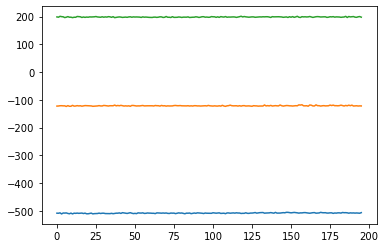

In [245]:
#affichage graphique de la projection sur ces nouveaux axes
plt.plot(cc)

[[-2.69386052  2.01623813 -1.10610742 -1.60986332  2.21632929]
 [-0.52115897 -1.48024515  3.06840516  1.96234502 -1.05417472]
 [ 0.43226681 -0.59786239 -0.07032398 -0.52363863  0.51684459]
 [ 0.06790665 -1.01148986 -1.0767889   0.58170855  0.79620165]
 [-0.67456148 -1.24542019 -0.31387925 -0.40348494  0.40291512]]


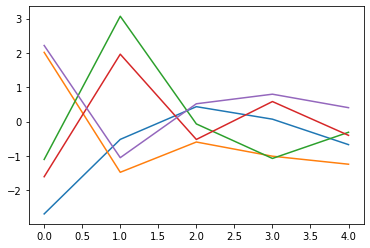

In [263]:
# les vecteurs propres
print(my_AFD.scalings_)
plt.plot(my_AFD.scalings_)

In [272]:
#la méthode permettant d’indiquer pour chaque billet s’il est original ou falsifié
df_tst = pd.read_csv('inconnu.csv', delimiter=';')

df_fb = fb[['diag','Sup']]
df_ob = ob[['diag','Sup']]

grav_fb = np.mean(df_fb)
grav_ob = np.mean(df_ob)

print(grav_fb,grav_ob)

df_tstafd = df_tst[['diag','Sup']]

for i in range(4):
    distfb = distance.euclidean(df_tstafd.loc[i,:],grav_fb)
    distob = distance.euclidean(df_tstafd.loc[i,:],grav_ob)
    
print(distfb,distob)

diag    139.445918
Sup      10.533673
dtype: float64 diag    141.520408
Sup       8.300000
dtype: float64
3.3171750876710684 0.26879960532286507


#### La fonction du centre des classes dans le nouvel espace.

In [267]:
yTrainin = df_tst.iloc[:,0]
yTrainin = yTrainin.astype('int')

#préparation des structures – matrice des explicatives
XTrainin = df_tst.iloc[:,1:]

In [269]:
affectation=my_AFD.predict(XTrainin)
print(XTrainin) 

   Right   Left   Sup   inf   diag
0  130.1  130.3   9.7  11.7  139.8
1  130.5  130.2  11.0  11.5  139.5
2  131.0  131.1   9.0   9.7  141.0
3  129.7  129.7   8.1   9.5  141.7


## 4. Comparaison de ACP et AFD

### charger les données

In [174]:
data_temperature = pd.read_csv("temperatures.csv",sep=";",decimal=".",header=0,index_col = 0)
X=data_temperature.drop(columns=['Region'])
y=pd.Categorical(data_temperature.Region).codes
print(y)

[2 3 2 2 0 1 1 1 0 0 3 1 3 0 0 1 2 0 1 3 3 0 1 2 3 2 1 2 2 3 3 3 3 0 2]


In [175]:
## projection obtenue par l’AFD en utilisant k axes
k=3
lda = AFD(n_components=k)
afd = lda.fit(X, y)
X_AFD=afd.transform(X)
pca = PCA(n_components=k)
X_ACP = pca.fit(X).transform(X)

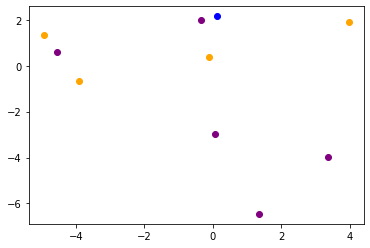

In [227]:
# Plot resultat AFD
data_projected = afd.fit_transform(X, y)

plt.scatter(data_projected[0,0], data_projected[0,1], color = 'blue')
plt.scatter(data_projected[1:3,0], data_projected[1:3,1], color = 'orange')
plt.scatter(data_projected[5:7,0], data_projected[5:7,1], color = 'orange')
plt.scatter(data_projected[3:5,0], data_projected[3:5,1], color = 'purple')
plt.scatter(data_projected[7:10,0], data_projected[7:10,1], color = 'purple')

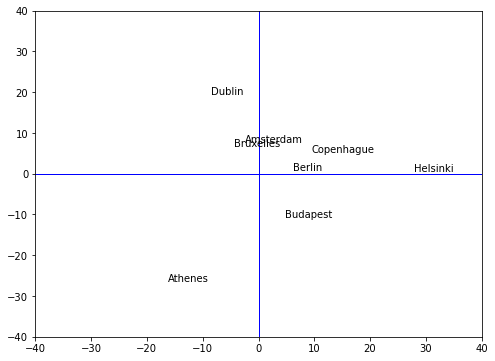

In [186]:
# Plot resultat ACP
fig, axes = plt.subplots(figsize=(8,6))
#positionnement des individus dans le premier plan
axes.set_xlim(-40,40) #même limites en abscisse
axes.set_ylim(-40,40) #et en ordonnée
#placement des étiquettes des observations
for i in range(8):
    plt.annotate(X.index[i],(X_ACP[i,0],X_ACP[i,1]))

#ajouter les axes
plt.plot([-40,40],[0,0],color='blue',linestyle='-',linewidth=1)
plt.plot([0,0],[-40,40],color='blue',linestyle='-',linewidth=1)
#affichage
plt.show()

### A vous de tester :p 